In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from pathlib import Path
from matplotlib.lines import Line2D
colors = ["steelblue", "lightcoral", "lightgreen"]
custom_lines = [Line2D([0], [0], color=colors[0], lw=4),
                Line2D([0], [0], color=colors[1], lw=4),
                Line2D([0], [0], color=colors[2], lw=4)]

In [4]:
project_dir = str(Path(os.getcwd()).parent)
datasets_path = project_dir + "/datasets/"
df = pd.read_csv(datasets_path + "down_detector_reported_problem_count.csv")

In [8]:
df_aws = df[df["provider"] == "aws"]
df[["cause", "percent"]].nunique()

cause      9
percent    7
dtype: int64

In [167]:
# Extract the reasons
def extract_reasons_magnitude(df):
    reasons = dict()
    providers = df["provider"].unique()
    for vendor in providers:
        total_reports = 0
        df_vendor = df[df['provider'] == vendor].dropna()
        events = df_vendor["event_id"].unique()
        report_reason = dict({})

        for event in events:
            df_ev = df_vendor[df_vendor["event_id"] == event]
            nr_reports = df_ev["count"].sum()
            total_reports += nr_reports
            cause_percent = df_ev[["cause", "percent"]].drop_duplicates(inplace=False).set_index('cause').T.to_dict('dict')
            for k, v in cause_percent.items():
                if k in report_reason:
                    report_reason[k] += nr_reports * cause_percent[k]["percent"]
                else:
                    report_reason[k] = nr_reports * cause_percent[k]["percent"]

        reasons[vendor] = report_reason

        for k, v in reasons[vendor].items():
            reasons[vendor][k] = round(100 * (v / total_reports), 2)
            
    return reasons

In [168]:
extracted_reasons = extract_reasons_magnitude(df)

5856
{'EC2': {'percent': 0.47}, 'AWS Console': {'percent': 0.47}, 'VPC': {'percent': 0.04}}
{'EC2': {'percent': 0.47}, 'AWS Console': {'percent': 0.47}, 'VPC': {'percent': 0.04}}
{'EC2': {'percent': 0.47}, 'AWS Console': {'percent': 0.47}, 'VPC': {'percent': 0.04}}
1314
{'EC2': {'percent': 0.47}, 'AWS Console': {'percent': 0.47}, 'VPC': {'percent': 0.04}}
{'EC2': {'percent': 0.47}, 'AWS Console': {'percent': 0.47}, 'VPC': {'percent': 0.04}}
{'EC2': {'percent': 0.47}, 'AWS Console': {'percent': 0.47}, 'VPC': {'percent': 0.04}}
8202
{'EC2': {'percent': 0.47}, 'AWS Console': {'percent': 0.47}, 'S3': {'percent': 0.04}}
{'EC2': {'percent': 0.47}, 'AWS Console': {'percent': 0.47}, 'S3': {'percent': 0.04}}
{'EC2': {'percent': 0.47}, 'AWS Console': {'percent': 0.47}, 'S3': {'percent': 0.04}}
2226
{'AWS Console': {'percent': 0.47}, 'EC2': {'percent': 0.47}, 'S3': {'percent': 0.04}}
{'AWS Console': {'percent': 0.47}, 'EC2': {'percent': 0.47}, 'S3': {'percent': 0.04}}
{'AWS Console': {'percent': 

{'aws': {'EC2': 47.0, 'AWS Console': 47.0, 'VPC': 2.24, 'S3': 1.76}}

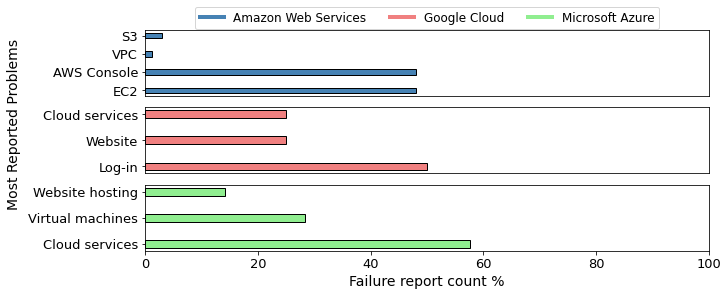

In [135]:
# TODO: Make barh, put horizontal line between providers
colors = ["steelblue"] * 4 + ["lightcoral"] * 3 + ["lightgreen"] * 3
fig, ax = plt.subplots(3, 1, figsize=(10, 4), constrained_layout=True, sharex=True)
aws = extracted_reasons['aws']
gcp = extracted_reasons['gcp']
azure = extracted_reasons['azure']

ax[0].barh([k.replace(" ", ' ') for k in list(aws.keys())], list(aws.values()), 0.3, color="steelblue", edgecolor="black")
ax[0].get_xaxis().set_visible(False)
ax[1].barh([k.replace(" ", ' ') for k in list(gcp.keys())], list(gcp.values()), 0.3, color="lightcoral", edgecolor="black")
ax[1].set_ylabel("Most Reported Problems", fontsize=14)
ax[1].yaxis.set_label_coords(-0.22, 0.75)
ax[1].get_xaxis().set_visible(False)
ax[2].barh([k.replace(" ", ' ') for k in list(azure.keys())], list(azure.values()), 0.3, color="lightgreen", label="Microsoft Azure", edgecolor="black")
ax[2].set_xlabel("Failure report count %", fontsize=14)
ax[2].set_xlim(0, 100)
ax[0].tick_params(axis='both', labelsize=13)
ax[1].tick_params(axis='both', labelsize=13)
ax[2].tick_params(axis='both', labelsize=13)

ax[0].legend(custom_lines, ['Amazon Web Services', 'Google Cloud', 'Microsoft Azure'], ncol=3, loc='center', bbox_to_anchor=(0.5, 1.18), fontsize=12)

plt.savefig(project_dir + "/plots/most_reported_problems_per_event_horizontal.pdf", dpi=100)

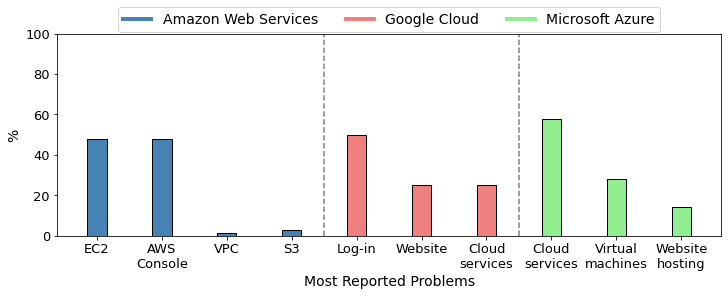

In [5]:
# TODO: Make barh, put horizontal line between providers
colors = ["steelblue"] * 4 + ["lightcoral"] * 3 + ["lightgreen"] * 3
fig, ax = plt.subplots(1, 1, figsize=(10, 4), constrained_layout=True, sharex=True)
aws = extracted_reasons['aws']
gcp = extracted_reasons['gcp']
azure = extracted_reasons['azure']

x_labels = list(aws.keys()) + list(gcp.keys()) + list(azure.keys())
bar_h = list(aws.values()) + list(gcp.values()) + list(azure.values())

ax.bar(x=np.arange(len(x_labels)), height=bar_h, width=0.3, color=colors, edgecolor="black")

ax.legend(custom_lines, ['Amazon Web Services', 'Google Cloud', 'Microsoft Azure'], ncol=3, loc='center', bbox_to_anchor=(0.5, 1.07), fontsize=14)
ax.set_xticks(np.arange(len(x_labels)))
ax.set_ylim(0, 100)
ax.tick_params(axis='both', labelsize=13)
ax.set_xticklabels([label.replace(" ", "\n") for label in x_labels], fontsize=13)
ax.set_ylabel("%", fontsize=14)
ax.set_xlabel("Most Reported Problems", fontsize=14)
ax.axvline(x=3.5, ls="dashed", c="gray")
ax.axvline(x=6.5, ls="dashed", c="gray")
plt.savefig(project_dir + "/plots/most_reported_problems_per_event_vertical.pdf", dpi=100)